<a href="https://colab.research.google.com/github/Henil21/University-Research/blob/main/ITM_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MRI Classification using CNN
**Index**

```
1. Fetching data ⛅
2. Helper function for visualizing  our data 🆘
3. visualizing the training data distribution 🔎
4. pre processing ⚙
5. Lets step into modeling 🕺
6. Helperfunction for plotting loss curves 📉
7. Adam V/S RMSprop 🤜
```
```
2.0  Brain MRI Classification 🧠
2.1  visualizing  our data 🔍
2.2  pre processing ⚙
2.3 Model Building 🕺
2.4 Plottin Loss 📉
```

In [ ]:
!nvidia-smi  -L
# making sure GPU is connected ✅

GPU 0: Tesla T4 (UUID: GPU-68ddcbea-2316-ebe4-4985-e26590d65ced)


##*1 Getting the data ⛅*

In [ ]:
#fetching the data from cloud
Chest_train='/content/drive/MyDrive/Chest/'
Chest_test='/content/drive/MyDrive/Chest-Test'

##2  *Helper function for Visualizing*🆘

In [ ]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir,target_class):

   # getting class vise dir link
   target=target_dir+target_class

   # taking 1 random image from a list of all images under a class
   random_img=random.sample(os.listdir(target),1)

   #as we have stored it in list we need to access it through index which is zero
   image=mpimg.imread(target+'/'+random_img[0])

   fig = plt.figure(figsize=(5, 2))  # Set the width and height of the figure


   #plotting image
   plt.imshow(image)

   plt.axis("off")
   print(f"img shape:{image.shape}")

img shape:(200, 300)


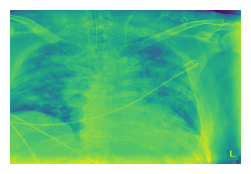

In [ ]:
view_random_image(target_dir=Chest_train,target_class='COVID-19')

## 3 Lets visualize the distribution of the training data 🔍

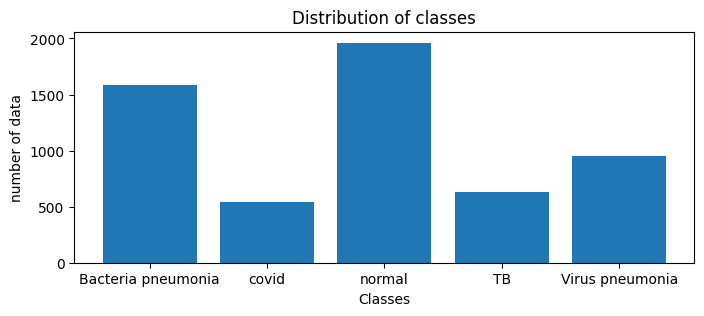

In [ ]:

# getting length of the sub classes
BAC_n=len(os.listdir('/content/drive/MyDrive/Chest/Bacteria pneumonia'))
COVID=len(os.listdir('/content/drive/MyDrive/Chest/COVID-19'))
Normal=len(os.listdir('/content/drive/MyDrive/Chest/NORMAL'))
TB=len(os.listdir('/content/drive/MyDrive/Chest/Tuberculosis'))
virus_n=len(os.listdir('/content/drive/MyDrive/Chest/Virus pneumonia'))

classes=['Bacteria pneumonia', "covid",'normal','TB','Virus pneumonia']
values=[BAC_n,COVID,Normal,TB,virus_n]

fig = plt.figure(figsize=(8, 3))  # Set the width and height of the figure

plt.bar(classes,values)

# Adding title to the plot
plt.title("Distribution of classes")

# Adding label on the y-axis
plt.ylabel('number of data')

# Adding label on the x-axis
plt.xlabel('Classes')

plt.show()

## 4.Pre-processing ⚙

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# recaling pixels
train_data_gen = ImageDataGenerator(rescale=1./255,
                                   )

# dividing into batches and
train_generator = train_data_gen.flow_from_directory(
    Chest_train,
    target_size=(224,224), #targeted shape
    batch_size=(32),#32  images per batch
    shuffle=True,
    seed=42,
    class_mode='categorical', # we are working with multiclass problem

)


# recaling pixels
test_data_gen = ImageDataGenerator(rescale=1./255
                                                              )

# dividing into batches and
test_generator = train_data_gen.flow_from_directory(
    Chest_test,
    target_size=(224, 224), #targeted shape
    batch_size=(32),#32  images per batch
     shuffle=False,
     seed=42,
    class_mode='categorical',# we are working with multiclass problem

)

Found 5669 images belonging to 5 classes.
Found 1395 images belonging to 5 classes.


In [ ]:
import os

# Specify the path to the directory you want to list subdirectories for
directory_path = '/content/drive/MyDrive/Chest-Test'

# Use the os.listdir() function to get a list of all items (files and directories) in the specified directory
items = os.listdir(directory_path)

# Iterate over the items and check if they are directories
subdirectories = []
for item in items:
    item_path = os.path.join(directory_path, item)
    if os.path.isdir(item_path):
        subdirectories.append(item)

# Print the list of subdirectories
print(subdirectories)


['Tuberculosis', 'COVID-19', 'NORMAL', 'Bacteria pneumonia', 'Virus pneumonia']


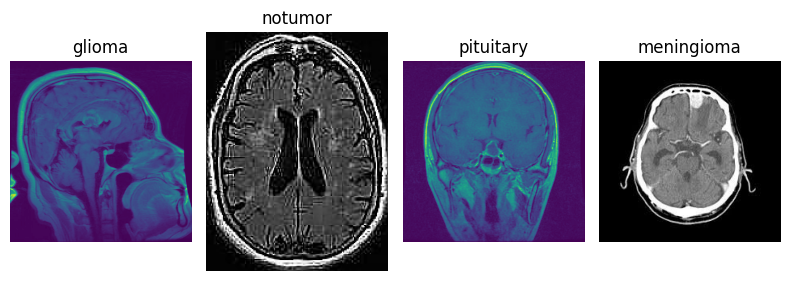

In [ ]:
import os
import matplotlib.pyplot as plt
import random

# Assuming your images are organized in folders, where each folder represents a specific class label
data_dir = '/content/drive/MyDrive/Brain_multiclass/Training'  # Specify the path to your dataset directory

class_folders = os.listdir(data_dir)  # Get the list of class folders

selected_images = []  # List to store the selected images

for class_folder in class_folders:
    class_path = os.path.join(data_dir, class_folder)  # Get the path of the current class folder
    image_files = os.listdir(class_path)  # Get the list of image files in the current class folder
    selected_file = random.choice(image_files)  # Select a random image file
    selected_image_path = os.path.join(class_path, selected_file)  # Get the path of the selected image
    selected_images.append((selected_image_path, class_folder))  # Add the selected image path and its class folder name

fig, axs = plt.subplots(1, len(selected_images), figsize=(8, 4))  # Create subplots

for i, (image_path, class_folder) in enumerate(selected_images):
    image = plt.imread(image_path)  # Load the image from the path
    axs[i].imshow(image)  # Show the image
    axs[i].axis('off')  # Turn off axis labels
    axs[i].set_title(class_folder)  # Set the title as the class folder name

plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Display the figure


> we got 5669 images divided into 5 sub-classes for training

> 1395 images divided into 5 sub-classes for testing

> total image [training+test]= 7064

run below cell if u wanna see numeric representation

In [ ]:
# train_generator[0]

## **5. Lets step into modeling 🕺**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import Sequential


tf.random.set_seed(42) #why 42? because it is Answer to the Ultimate Question of Life, the Universe, and Everything if you know you know

Model_1=Sequential([
    Conv2D(500,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size
    MaxPool2D(),
    Conv2D(250, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(150, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(100, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # softmax as we are working with multiclass problem
])


In [ ]:
Model_1.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.RMSprop(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp
                            metrics=['accuracy'])# evaluation


In [ ]:
history=Model_1.fit(train_generator,
                   epochs=10,
                    steps_per_epoch=len(train_generator ),
                   validation_data=(test_generator),
                   validation_steps=len(test_generator ))

Epoch 1/10
178/178 [==============================] - ETA: 0s - loss: 1.2853 - accuracy: 0.4699

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import Sequential

from tensorflow.keras.applications import VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG-19 as a feature extractor
model = Sequential()
model.add(base_model)

# Add custom top layers for the new task
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))  # num_classes is the number of classes in your new task
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

## 6.helperfunction for plotting loss curves 📉

In [ ]:
import pandas as pd
def plot_loss_curves(hist):
    pd.DataFrame(hist.history).plot(figsize=(5,5))

In [ ]:
plot_loss_curves(history)

## 7.Adam V/S RMSprop 🤜

In [ ]:
tf.random.set_seed(42)

Model_2=Sequential([
    Conv2D(500,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size
    MaxPool2D(),
    Conv2D(250, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(150, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(100, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # softmax as we are working with multiclass problem
])
Model_2.compile(loss='categorical_crossentropy' ,# as we got multiple classes
                            optimizer=tf.keras.optimizers.Adam(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp
                            metrics=['accuracy'])# evaluation

history_2=Model_2.fit(train_generator,
                   epochs=10,
                    steps_per_epoch=len(train_generator ),
                   validation_data=(test_generator),
                   validation_steps=len(test_generator ))

In [ ]:
plot_loss_curves(history_2)

In [ ]:

import numpy as np
y_pred=Model_2.predict(test_generator_brain)
yy_pred=model.predict(test_generator_brain)
yy_pred=np.argmax(yy_pred,axis=-1)
y_pred=np.argmax(y_pred,axis=-1)
yyy_pred=model.predict(test_generator_brain)
yyy_pred=np.argmax(yyy_pred,axis=-1)

In [ ]:

y_true=test_generator_brain.labels



import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have a trained model named 'model' and an image data generator named 'data_generator'
# predictions = model.predict_generator(data_generator)
# predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels
# true_classes = data_generator.classes
class_labels = list(test_generator_brain.class_indices.keys())
# y_pred=np.sort(y_pred)
confusion_mtx = confusion_matrix(y_true, y_pred)

report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

In [ ]:

y_true=test_generator_brain.labels



import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have a trained model named 'model' and an image data generator named 'data_generator'
# predictions = model.predict_generator(data_generator)
# predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels
# true_classes = data_generator.classes
class_labels = list(test_generator_brain.class_indices.keys())
# y_pred=np.sort(y_pred)
confusion_mtx = confusion_matrix(y_true, yy_pred)

report = classification_report(y_true, yy_pred, target_names=class_labels)
print(report)

In [ ]:

y_true=test_generator_brain.labels



import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have a trained model named 'model' and an image data generator named 'data_generator'
# predictions = model.predict_generator(data_generator)
# predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels
# true_classes = data_generator.classes
class_labels = list(test_generator_brain.class_indices.keys())
# y_pred=np.sort(y_pred)
confusion_mtx = confusion_matrix(y_true, yyy_pred)

report = classification_report(y_true, yyy_pred, target_names=class_labels)
print(report)

#2.0  Brain MRI Classification 🧠

In [ ]:
Brain_train='/content/drive/MyDrive/Brain_multiclass/Training/'
Brain_test='/content/drive/MyDrive/Brain_multiclass/Testing/'

## 2.1 visualizing  our data **🔍**

In [ ]:
view_random_image(target_dir=Brain_train,target_class='meningioma')

In [ ]:

# getting length of the sub classes
gol=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/glioma'))
men=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/meningioma'))
Normal=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/notumor'))
pit=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/pituitary'))

classes=['glioma', "meningioma",'normal','pituitary']
values=[gol,men,Normal,pit]

fig = plt.figure(figsize=(8, 3))  # Set the width and height of the figure

plt.bar(classes,values)

# Adding title to the plot
plt.title("Distribution of classes")

# Adding label on the y-axis
plt.ylabel('number of data')

# Adding label on the x-axis
plt.xlabel('Classes')

plt.show()

## 2.2 Pre-processing ⚙

In [ ]:
# train_generator[0]


## 2.3 Model Building 🕺

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import Sequential
tf.random.set_seed(42)

Model_2=Sequential([
    Conv2D(500,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size
    MaxPool2D(),
    Conv2D(250, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(250, 3, activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(4, activation='softmax') # softmax as we are working with multiclass problem
])
Model_2.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.Adam(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp
                            metrics=['accuracy'])# evaluation

history_2=Model_2.fit(train_generator_brain,
                   epochs=5,
                    steps_per_epoch=len(# dividing into batches and
                  train_generator_brain  ),
                   validation_data=(test_generator_brain),
                   validation_steps=len(test_generator_brain ))

## 2.4 Plottin Loss 📉

In [ ]:
plot_loss_curves(history_2)

## 2.5 RMSprop

In [ ]:
model_3=Sequential([
    Conv2D(500,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size
    MaxPool2D(),
    Conv2D(250, 3, activation='relu'),
    MaxPool2D(),
     Conv2D(250, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # softmax as we are working with multiclass problem
])
# we clone the above model  architecture
model_3.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.RMSprop(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp
                            metrics=['accuracy'])# evaluation

history_3=Model_2.fit(train_generator_brain,
                   epochs=5,
                    steps_per_epoch=len(# dividing into batches and
                  train_generator_brain  ),
                   validation_data=(test_generator_brain),
                   validation_steps=len(test_generator_brain ))